# Examples

#### Example 1: A single simple sample set

Assume below is the given sample set. Let us plot both the direct simple regression line and standardized one to note the differences. 

X|Y|
---|---|
2.2|14
2.7|23
3|13
3.55|22
4|15
4.5|20
4.75|28
5.5|23

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

def plot_regs(x_i, y_i, axr, std=False, std_full=True ,label=''):
    
    ax = axr
    
    if std==True:  # we do this upfront to pass on updated x,y, mean values
        x_bar = sum(x_i)/len(x_i)
        y_bar = sum(y_i)/len(y_i)
        x_sd = sqrt(sum([(i - x_bar)**2 for i in x_i])/len(x_i))
        y_sd = sqrt(sum([(i - y_bar)**2 for i in y_i])/len(y_i))
        if std_full == True:            # full standardization
            x_i = [round((i - x_bar)/x_sd,3) for i in x_i]
            y_i = [round((i - y_bar)/y_sd,3) for i in y_i]
#             print(x_i, y_i)
        else:                           # partial standardization
            x_i = [(i - x_bar) for i in x_i]
            y_i = [(i - y_bar) for i in y_i]

        
#         num,dem1, dem2 = 0,0,0
#         for i, j in zip(x_i, y_i):
#             num += (i - x_bar)*(j - y_bar)
#             dem1 += (j - y_bar)**2
#             dem2 += (i - x_bar)**2
#         bhat_1 = round(num/(sqrt(dem1)*sqrt(dem2)),3)
#         bhat_0 = 0
#         x = np.linspace(min(x_i), max(x_i), 10)
#         y = bhat_0 + bhat_1*x
#         ax.plot(x,y, color='green', label='$E(Y|x) = {} + {}x$'.format(bhat_0, bhat_1))
        
#         num,dem1, dem2 = 0,0,0
#         for i, j in zip(x_i, y_i):
#             num += (i - x_bar)*(j - y_bar)
#             dem1 += (j - y_bar)**2
#             dem2 += (i - x_bar)**2
#         bhat_1 = round(num/(sqrt(dem1)*sqrt(dem2)),3)
#         bhat_0 = 0
#         y = np.linspace(min(y_i), max(y_i), 10)
#         x = bhat_0 + bhat_1*y
#         ax.plot(x,y, color='pink', label='$E(X|y) = {} + {}y$'.format(bhat_0, bhat_1))        
        
    xmin, xmax, ymin, ymax = min(x_i)-1,max(x_i)+1, min(y_i)-1, max(y_i)+1
          
    x_bar = sum(x_i)/len(x_i)
    y_bar = sum(y_i)/len(y_i)
    
    # Constructing E(Y|x)
    num,dem = 0,0
    for i, j in zip(x_i, y_i):
        num += (i - x_bar)*(j - y_bar)
        dem += (i - x_bar)**2
    bhat_1 = round(num/dem,3)
    bhat_0 = round(y_bar - bhat_1*x_bar,3)
    # print('bhat_0:{}, bhat_1:{} for y'.format(bhat_0, bhat_1))
    x = np.linspace(min(x_i), max(x_i), 10)
    y = bhat_0 + bhat_1*x
    ax.plot(x,y, color='red', label='$E(Y|x) = {} {:+}x$'.format(bhat_0, bhat_1))

    # Constructing E(X|y)
    num,dem = 0,0
    for i, j in zip(x_i, y_i):
        num += (i - x_bar)*(j - y_bar)
        dem += (j - y_bar)**2
    bhat_1 = round(num/dem,3)
    bhat_0 = round(x_bar - bhat_1*y_bar,3)
    # print('bhat_0:{}, bhat_1:{} for x'.format(bhat_0, bhat_1))   
    y = np.linspace(min(y_i), max(y_i), 10)
    x = bhat_0 + bhat_1*y
    ax.plot(x,y, color='blue', label='$E(X|y) = {} {:+}y$'.format(bhat_0, bhat_1))

    # mean lines
    ax.axvline(x=x_bar, ls=':', color='green')
    ax.axhline(y=y_bar, ls=':', color='green')

    ax.scatter(x_i, y_i)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(label)
    ax.legend()

\ 


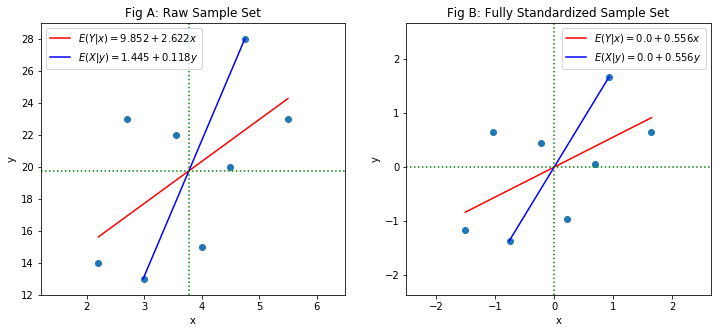

In [17]:
x_i = [2.2, 2.7, 3, 3.55, 4, 4.5, 4.75, 5.5]   # a sample set
y_i = [14, 23, 13, 22, 15, 20, 28, 23] 

fig, axr = plt.subplots(1,2, figsize=(12,5))
plot_regs(x_i, y_i, axr[0], std=False, label='Fig A: Raw Sample Set')
plot_regs(x_i, y_i, axr[1], std=True, std_full=True, label='Fig B: Fully Standardized Sample Set')
plt.show()

Note the regression line equations in both figures. In Figure B, as expected, both lines get the same slope which is _standardized covariance_ $Cov(X_s,Y_s)$. Note the value of the common slope. It is positive and less than 1, this tells both sample sets are related linearly to an extent.

#### Example 2:  Wikipedia Sample set

Let us try a perfectly covarying example. 

X|Y|
---|---|
1|0.11
2|0.12
3|0.13
5|0.15
8|0.18


\ 


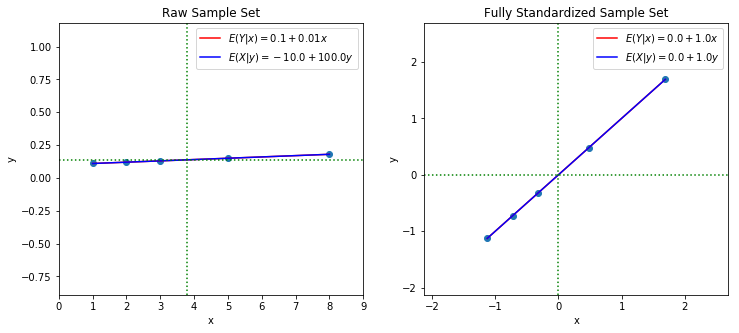

In [18]:
x_i = [1,2,3,5,8]   # a sample set
y_i = [0.11,0.12,0.13,0.15,0.18] 

fig, axr = plt.subplots(1,2, figsize=(12,5))
plot_regs(x_i, y_i, axr[0], std=False, label='Raw Sample Set')
plot_regs(x_i, y_i, axr[1], std=True, std_full=True, label='Fully Standardized Sample Set')
plt.show()

Aha! When the dataset is perfectly linearly related, we get the _standardized covariance_ slope as 1. Ain't we getting somewhere? 

#### Example 3: With different linear relationships

To test the different values of standardized covariance, we shall generate different datasets, that has perfect linearity in both directions (positive and negative), and also some what in the middle, including no linearity. 

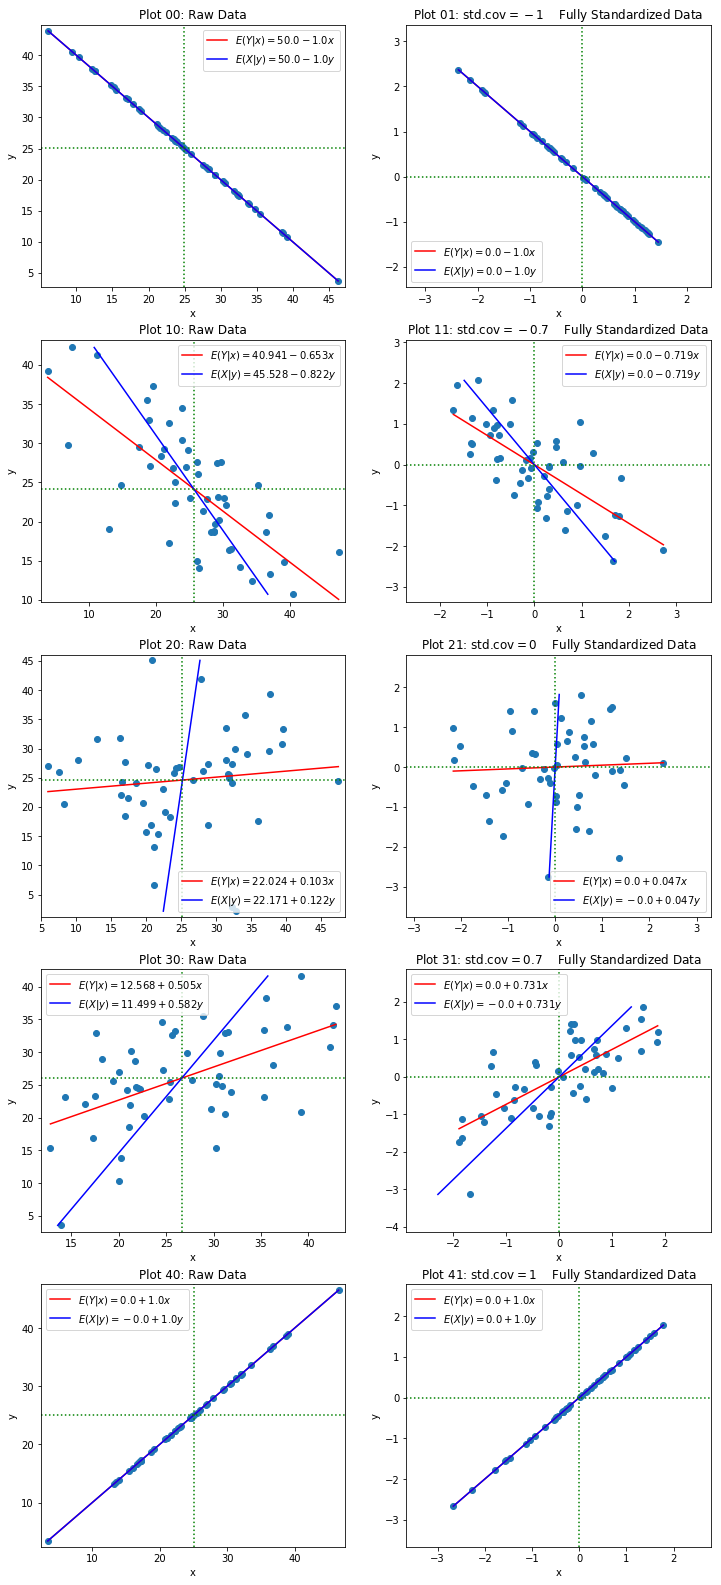

In [20]:
def give_cov(corr, X, Y, n):
    means = [X.mean(), Y.mean()]  
    stds = [X.std() / 3, Y.std() / 3]
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs, n).T
    return m[0], m[1]

X = np.array([0, 50])
Y = np.array([0, 50])
n = 50

np.random.seed(seed=0)

cov_list = [-1, -0.7, 0, 0.7, 1]  # test correlation values
n_rows = len(cov_list)

fig, axr = plt.subplots(n_rows,2, figsize=(12,28/(6 - n_rows)))
for i in range(0,len(cov_list)):  # 0,1,2,3,4 rows
    t_l = ['Raw Data','Fully Standardized Data']
    s_b = [False, True]
    s_t = [False, True]  
    for j in range(0,2): #0,1 cols
        if len(cov_list) == 1:
            ax = axr[j]
        else:
            ax = axr[i,j]
        cv, t = cov_list[i], t_l[j]        
        x_i , y_i = give_cov(cv, X, Y, n)  # get dataset for given covariance   
        label = "Plot {}{}: {}".format(i,j,t)
        if j == 1:
            label = "Plot {}{}: std.cov$={}$    {}".format(i,j,cv, t)        
        plot_regs(x_i, y_i, ax, std=s_b[j], std_full=s_t[j] ,label=label)
        
plt.show()


Thus, not only that our standardized covariance got rid of units, but also retains value between $\pm 1$, perfectly reflective of the linear relationship in the dataset.  Thus we observe empirically via examples the range of standardized covariance. 